# Uproot example

### _Author: Damian Trybek_

In [1]:
from IPython.display import display, Markdown

## Load data

In [2]:
input_files = "data/*.root"

def load_data():
    import uproot
    
    return uproot.concatenate(input_files)

coincidences = load_data()
print(coincidences)

[{largerTime: 6.74e-07, runID: 0, axialPos: 0, rotationAngle: 0, ... 121, 115, 0]}]


## Show histograms

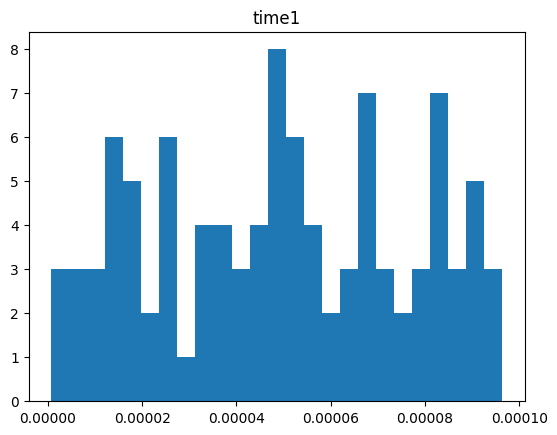

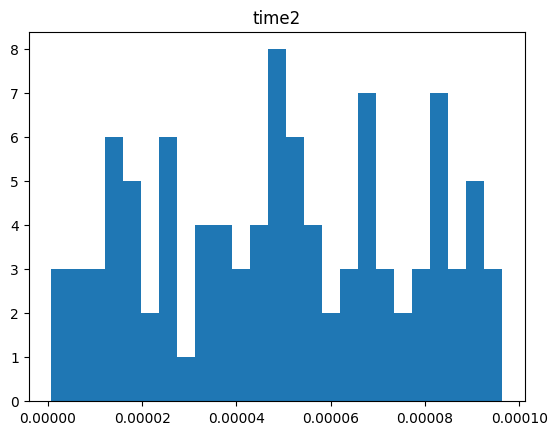

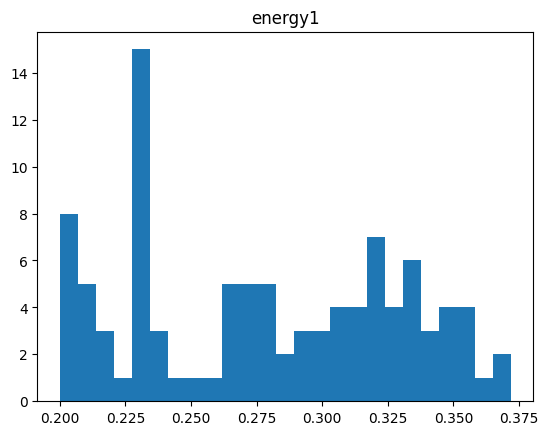

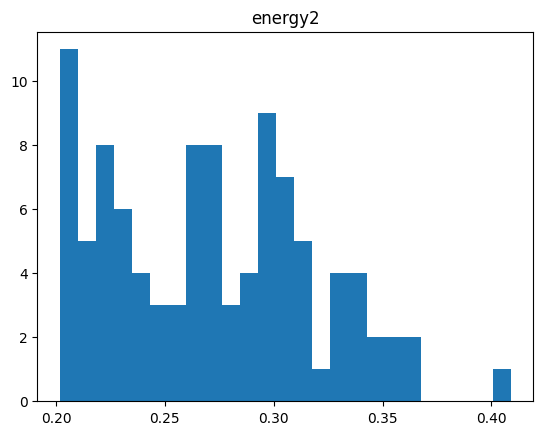

In [3]:
def plot_histogram( name):
    import matplotlib.pyplot as plt
    
    _, ax = plt.subplots()
    ax.hist(coincidences[name], bins=25)
    ax.set_title(name)

branch_names = ["time1", "time2", "energy1", "energy2"]

for branch_name in branch_names:
    plot_histogram(branch_name)

## Calculate minimum, maximum and median values

In [4]:
def find_mean_max_med(name):
    import numpy as np
    
    data = coincidences[name]

    display(Markdown(f'''
**Values of {name}**
- minimum: {np.min(data)}
- maximum: {np.max(data)}
- meadian: {np.mean(data)}
    '''))

branch_names = ["energy1", "energy2"]

for branch_name in branch_names:
    find_mean_max_med(branch_name)


**Values of energy1**
- minimum: 0.2000238448381424
- maximum: 0.3718954622745514
- meadian: 0.27886529922485354
    


**Values of energy2**
- minimum: 0.20179855823516846
- maximum: 0.40886762738227844
- meadian: 0.27132295608520507
    

## Dealing with huge dataset

### Option 1: Read only necessary columns

In [5]:
display(Markdown(f'Original size of loaded data: {coincidences.nbytes} bytes.'))

def load_necessary_data():
    import uproot
    
    return uproot.concatenate(input_files, ["time1", "time2", "energy1", "energy2"])

display(Markdown(f'Size, when only necessary data read: {load_necessary_data().nbytes} bytes.'))

Original size of loaded data: 27200 bytes.

Size, when only necessary data read: 2400 bytes.

### Option 2: Use lazy data load

In [6]:
def load_lazy():
    import uproot
    
    return uproot.lazy(input_files)

in_memory_data = coincidences
lazy_loaded_data = load_lazy()

def measure_time_ms(data, name):
    import numpy as np
    import time
    
    row = data[name]
    a = time.perf_counter()
    np.median(row)
    b = time.perf_counter()
    
    return (b - a) * 1000
    
display(Markdown(f'''
Calculation time on in-memory data: {measure_time_ms(in_memory_data, 'energy2'):.3f}ms

Calculation time on lazy-loaded data: {measure_time_ms(lazy_loaded_data, 'energy2'):.3f}ms
'''))


Calculation time on in-memory data: 0.396ms

Calculation time on lazy-loaded data: 1.146ms
